<a href="https://colab.research.google.com/github/ghostfm3/ksks/blob/master/jppca1kai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import zipfile
import urllib.request
import os.path
import glob

In [ ]:
from google.colab import files

In [ ]:
URL = 'https://www.aozora.gr.jp/cards/000879/files/98_ruby_256.zip'

In [ ]:
def download(URL):
    zip_file = re.split(r'/', URL)[-1] #➀
    urllib.request.urlretrieve(URL, zip_file) #➁
    dir = os.path.splitext(zip_file)[0] #➂

    with zipfile.ZipFile(zip_file) as zip_object: #➃
        zip_object.extractall(dir) #➄

    os.remove(zip_file) #➅

    path = os.path.join(dir,'*.txt') #➆
    list = glob.glob(path) #➇
    return list[0] #➈


In [ ]:
def convert(download_text):
    data = open(download_text, 'rb').read() #➀
    text = data.decode('shift_jis') #➁

    # 本文抽出
    text = re.split(r'\-{5,}', text)[2] #➂  
    text = re.split(r'底本：', text)[0] #➃
    text = re.split(r'［＃改ページ］', text)[0] #➄

    # ノイズ削除
    text = re.sub(r'《.+?》', '', text) #➅
    text = re.sub(r'［＃.+?］', '', text) #➆
    text = re.sub(r'｜', '', text) #➇
    text = re.sub(r'\r\n', '', text) #➈
    text = re.sub(r'\u3000', '', text) #➉   

    return text

In [ ]:
download_file = download(URL)
text = convert(download_file)

print(text)

或曇つた冬の日暮である。私は横須賀発上り二等客車の隅に腰を下して、ぼんやり発車の笛を待つてゐた。とうに電燈のついた客車の中には、珍らしく私の外に一人も乗客はゐなかつた。外を覗くと、うす暗いプラツトフオオムにも、今日は珍しく見送りの人影さへ跡を絶つて、唯、檻に入れられた小犬が一匹、時々悲しさうに、吠え立ててゐた。これらはその時の私の心もちと、不思議な位似つかはしい景色だつた。私の頭の中には云ひやうのない疲労と倦怠とが、まるで雪曇りの空のやうなどんよりした影を落してゐた。私は外套のポツケツトへぢつと両手をつつこんだ儘、そこにはいつてゐる夕刊を出して見ようと云ふ元気さへ起らなかつた。が、やがて発車の笛が鳴つた。私はかすかな心の寛ぎを感じながら、後の窓枠へ頭をもたせて、眼の前の停車場がずるずると後ずさりを始めるのを待つともなく待ちかまへてゐた。所がそれよりも先にけたたましい日和下駄の音が、改札口の方から聞え出したと思ふと、間もなく車掌の何か云ひ罵る声と共に、私の乗つてゐる二等室の戸ががらりと開いて、十三四の小娘が一人、慌しく中へはいつて来た、と同時に一つづしりと揺れて、徐に汽車は動き出した。一本づつ眼をくぎつて行くプラツトフオオムの柱、置き忘れたやうな運水車、それから車内の誰かに祝儀の礼を云つてゐる赤帽――さう云ふすべては、窓へ吹きつける煤煙の中に、未練がましく後へ倒れて行つた。私は漸くほつとした心もちになつて、巻煙草に火をつけながら、始めて懶い睚をあげて、前の席に腰を下してゐた小娘の顔を一瞥した。それは油気のない髪をひつつめの銀杏返しに結つて、横なでの痕のある皸だらけの両頬を気持の悪い程赤く火照らせた、如何にも田舎者らしい娘だつた。しかも垢じみた萌黄色の毛糸の襟巻がだらりと垂れ下つた膝の上には、大きな風呂敷包みがあつた。その又包みを抱いた霜焼けの手の中には、三等の赤切符が大事さうにしつかり握られてゐた。私はこの小娘の下品な顔だちを好まなかつた。それから彼女の服装が不潔なのもやはり不快だつた。最後にその二等と三等との区別さへも弁へない愚鈍な心が腹立たしかつた。だから巻煙草に火をつけた私は、一つにはこの小娘の存在を忘れたいと云ふ心もちもあつて、今度はポツケツトの夕刊を漫然と膝の上へひろげて見た。すると其時夕刊の紙面に落ちてゐた外光が、突然電燈の光に変つて、刷の悪い何欄かの活字

In [ ]:
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null
!echo mecab-config --dicdir"/mecab-ipadic-neologd"

fatal: destination path 'mecab-ipadic-neologd' already exists and is not an empty directory.
mecab-config --dicdir/mecab-ipadic-neologd


In [ ]:
pip install unidic-lite

In [ ]:
import MeCab

In [ ]:
mecab = MeCab.Tagger("-Owakati")
text1 = mecab.parse(text)

print(text1)

或 曇 つた 冬 の 日暮 で ある 。 私 は 横須賀 発 上り 二 等 客車 の 隅 に 腰 を 下し て 、 ぼんやり 発車 の 笛 を 待つ て ゐ た 。 とう に 電燈 の つい た 客車 の 中 に は 、 珍らしく 私 の 外 に 一人 も 乗客 は ゐ な かつ た 。 外 を 覗く と 、 うす暗い プラツトフオオム に も 、 今日 は 珍しく 見送り の 人影 さへ 跡 を 絶つ て 、 唯 、 檻 に 入れ られ た 小犬 が 一 匹 、 時々 悲し さ う に 、 吠え立て て ゐ た 。 これ ら は その 時 の 私 の 心もち と 、 不思議 な 位 似つかはしい 景色 だつ た 。 私 の 頭 の 中 に は 云ひ やう の ない 疲労 と 倦怠 と が 、 まるで 雪曇り の 空 の やう な どんより し た 影 を 落し て ゐ た 。 私 は 外套 の ポツ ケツト へ ぢつと 両手 を つつこ ん だ 儘 、 そこ に は いつ て ゐる 夕刊 を 出し て 見よう と 云ふ 元気 さへ 起ら な かつ た 。 が 、 やがて 発車 の 笛 が 鳴 つ た 。 私 は かすか な 心 の 寛ぎ を 感じ ながら 、 後 の 窓枠 へ 頭 を もた せ て 、 眼 の 前 の 停車 場 が ずるずる と 後ずさり を 始める の を 待つ と も なく 待ち か まへ て ゐ た 。 所 が それ より も 先 に けたたましい 日和 下駄 の 音 が 、 改札 口 の 方 から 聞え 出し た と 思ふ と 、 間 も なく 車掌 の 何 か 云ひ 罵る 声 と 共 に 、 私 の 乗 つ て ゐる 二 等 室 の 戸 が がらり と 開い て 、 十 三 四 の 小娘 が 一人 、 慌しく 中 へ は いつ て 来 た 、 と 同時 に 一 つ づ しり と 揺れ て 、 徐に 汽車 は 動き 出し た 。 一 本 づつ 眼 を くぎ つ て 行く プラツトフオオム の 柱 、 置き 忘れ た やう な 運水 車 、 それ から 車内 の 誰 か に 祝儀 の 礼 を 云つ て ゐる 赤帽 ― ― さう 云ふ すべて は 、 窓 へ 吹きつける 煤煙 の 中 に 、 未練 がましく 後 へ 倒れ て 行つ た 。 私 

In [ ]:
separated_text = text1.split()
print(separated_text)

['或', '曇', 'つた', '冬', 'の', '日暮', 'で', 'ある', '。', '私', 'は', '横須賀', '発', '上り', '二', '等', '客車', 'の', '隅', 'に', '腰', 'を', '下し', 'て', '、', 'ぼんやり', '発車', 'の', '笛', 'を', '待つ', 'て', 'ゐ', 'た', '。', 'とう', 'に', '電燈', 'の', 'つい', 'た', '客車', 'の', '中', 'に', 'は', '、', '珍らしく', '私', 'の', '外', 'に', '一人', 'も', '乗客', 'は', 'ゐ', 'な', 'かつ', 'た', '。', '外', 'を', '覗く', 'と', '、', 'うす暗い', 'プラツトフオオム', 'に', 'も', '、', '今日', 'は', '珍しく', '見送り', 'の', '人影', 'さへ', '跡', 'を', '絶つ', 'て', '、', '唯', '、', '檻', 'に', '入れ', 'られ', 'た', '小犬', 'が', '一', '匹', '、', '時々', '悲し', 'さ', 'う', 'に', '、', '吠え立て', 'て', 'ゐ', 'た', '。', 'これ', 'ら', 'は', 'その', '時', 'の', '私', 'の', '心もち', 'と', '、', '不思議', 'な', '位', '似つかはしい', '景色', 'だつ', 'た', '。', '私', 'の', '頭', 'の', '中', 'に', 'は', '云ひ', 'やう', 'の', 'ない', '疲労', 'と', '倦怠', 'と', 'が', '、', 'まるで', '雪曇り', 'の', '空', 'の', 'やう', 'な', 'どんより', 'し', 'た', '影', 'を', '落し', 'て', 'ゐ', 'た', '。', '私', 'は', '外套', 'の', 'ポツ', 'ケツト', 'へ', 'ぢつと', '両手', 'を', 'つつこ', 'ん', 'だ', '儘', '、', 'そこ', 'に', 'は', 'いつ', 'て', 'ゐる', '夕刊', 'を',

In [ ]:
with open('output1.txt', 'w') as f:
    f.write(text1)

In [ ]:
from google.colab import files

files.download('output1.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sys
sys.path.append('..')
import numpy as np
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [ ]:
import codecs
text2 = text1
#text1 = codecs.open('output1.txt', 'r', 'utf-8', "ignore").read().splitlines()

result = ''.join(text2)
text3 = result

corpus, word_to_id, id_to_word = preprocess(text3)

print(corpus)
print(id_to_word)

[  0   1   2 ... 629 630 631]
{0: '或', 1: '曇', 2: 'つた', 3: '冬', 4: 'の', 5: '日暮', 6: 'で', 7: 'ある', 8: '。', 9: '私', 10: 'は', 11: '横須賀', 12: '発', 13: '上り', 14: '二', 15: '等', 16: '客車', 17: '隅', 18: 'に', 19: '腰', 20: 'を', 21: '下し', 22: 'て', 23: '、', 24: 'ぼんやり', 25: '発車', 26: '笛', 27: '待つ', 28: 'ゐ', 29: 'た', 30: 'とう', 31: '電燈', 32: 'つい', 33: '中', 34: '珍らしく', 35: '外', 36: '一人', 37: 'も', 38: '乗客', 39: 'な', 40: 'かつ', 41: '覗く', 42: 'と', 43: 'うす暗い', 44: 'プラツトフオオム', 45: '今日', 46: '珍しく', 47: '見送り', 48: '人影', 49: 'さへ', 50: '跡', 51: '絶つ', 52: '唯', 53: '檻', 54: '入れ', 55: 'られ', 56: '小犬', 57: 'が', 58: '一', 59: '匹', 60: '時々', 61: '悲し', 62: 'さ', 63: 'う', 64: '吠え立て', 65: 'これ', 66: 'ら', 67: 'その', 68: '時', 69: '心もち', 70: '不思議', 71: '位', 72: '似つかはしい', 73: '景色', 74: 'だつ', 75: '頭', 76: '云ひ', 77: 'やう', 78: 'ない', 79: '疲労', 80: '倦怠', 81: 'まるで', 82: '雪曇り', 83: '空', 84: 'どんより', 85: 'し', 86: '影', 87: '落し', 88: '外套', 89: 'ポツ', 90: 'ケツト', 91: 'へ', 92: 'ぢつと', 93: '両手', 94: 'つつこ', 95: 'ん', 96: 'だ', 97: '儘', 98: 'そこ', 99:

In [ ]:
import sys
sys.path.append('..')
import numpy as np
import MeCab
import codecs

def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

def create_co_matrix(corpus, vocab_size, window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size + 1):
      left_idx = idx - i
      right_idx = idx + i

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] +=1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] +=1
  
  return co_matrix

def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
  if query not in word_to_id:
    print('%s is not found' % query)
    return

  print('\n[query]' + query)
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]

  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)
  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], query_vec)
  
  count = 0
  for i in (-1 * similarity).argsort():
    if id_to_word[i] == query:
      continue
    print(' %s: %s' % (id_to_word[i], similarity[i]))

    count += 1
    if count >= top:
      return


text2 = text1

result = ''.join(text2)
text3 = result

corpus, word_to_id, id_to_word = preprocess(text3)

vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

print('covariance matrix')
print(C) 

covariance matrix
[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]


In [ ]:
!pip install japanize_matplotlib

In [ ]:
import numpy as np
import pandas as pd
import urllib.request 
import matplotlib.pyplot as plt
import sklearn    #機械学習のライブラリ
from sklearn.decomposition import PCA   #主成分分析器
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from pandas import plotting 
import japanize_matplotlib

In [ ]:
pca = PCA(n_components=10)
pca.fit(C)
# データを主成分空間に写像
pca_cor = pca.transform(C)

In [ ]:
word_vecs = pca_cor
for word_id, word in id_to_word.items():
  print(word, word_vecs[word_id])

或 [-0.03890845  0.55320227 -0.86346784 -0.97302311 -0.4722981   0.14426999
 -0.12467108 -0.34654069 -0.55482991  0.26438223]
曇 [-0.724292    0.01655302  0.23046423 -0.04367528 -0.14303364  0.32266611
 -0.11744332 -0.22092869  0.04468798 -0.01620194]
つた [-0.68109539  0.02668735  0.20152677 -0.06677128 -0.01161956  0.39744727
 -0.27557404 -0.16658845 -0.03702653 -0.00167962]
冬 [-0.61350976  0.13013589  0.28656089  0.02666884  0.15012122 -0.3952595
 -0.01807427  0.2924166  -0.07140495 -0.06354434]
の [10.2163756  -5.89274192 -2.21104552 -4.32202686 20.44641132 13.70713043
 -4.31857547  7.7292246   1.336707   -0.89920017]
日暮 [-0.56305674  0.11124951  0.24766634  0.05403355  0.25077411 -0.27111375
 -0.06513875  0.42112622 -0.01142712 -0.07638977]
で [ 2.29377864  0.99040023 -1.58299602 -0.61411564  0.79933202 -4.25184431
  0.0720056   3.80690346 -1.18266653  0.09860231]
ある [ 2.71085057  2.86679534  2.78958603  2.20038581  0.75635518  1.181363
  0.14800669  0.34463113 -0.92006006  0.13009012]


In [ ]:
def cos_similarity(x, y, eps=1e-8):
  nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
  ny = y / (np.sqrt(np.sum(y ** 2)) + eps)

  return np.dot(nx, ny)



In [ ]:
most_similar('ぼんやり', word_to_id, id_to_word, pca_cor, top=10)


[query]ぼんやり
 やがて: 0.999999979004821
 改札: 0.9999726346549639
 小さな: 0.9995780392765895
 横: 0.9994452381515302
 うす暗い: 0.9990259631018636
 べく: 0.998198109235061
 置き: 0.9980095621288462
 忽ち: 0.9980077799598108
 恰も: 0.9979350547372279
 車: 0.9979350547372278


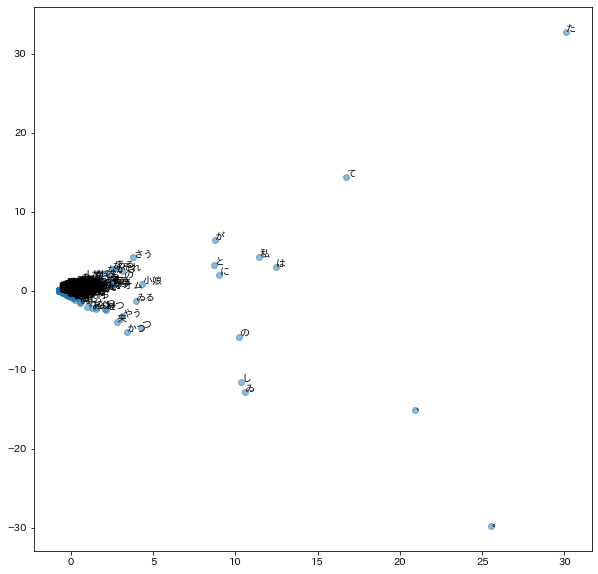

In [ ]:
for word, word_id in word_to_id.items():
  plt.annotate(word, (pca_cor[word_id, 0], pca_cor[word_id, 1]))

plt.rcParams["figure.figsize"] = (10, 5.5)
plt.scatter(pca_cor[:,0], pca_cor[:,1], alpha=0.5)
plt.show()